возрат в лонг если было закрытие лонга то возрат по минимуму из двух уровней
Проверить, начинается ли у меня новое окно, если возникает разладка по критерию в направлении открытой позиции
Интервал по критерию стьюдента, а не по уровню?

In [1]:
# для совместимости с версией 2
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from builtins import *

In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%load_ext cython
#%load_ext snakeviz
#%load_ext line_profiler
import pandas as pd 
import numpy as np
import numba
import cython
import matplotlib.pyplot as plt
#размер картинки
plt.rc('figure', figsize=(10, 10))
#цвета графиков
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler('color', [u'b', u'g', u'r', u'c', u'm', u'y', u'k', u'tomato', u'orange', u'maroon', u'cyan'])
#[u'b', u'g', u'r', u'c', u'm', u'y', u'k', u'tomato', u'orange', u'maroon', u'cyan']
#[u'b', u'g', u'r', u'c', u'm', u'y', u'k']
from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot
#from statsmodels.graphics.tsaplots import *
import math
#import statsmodels.formula.api as sm
import statsmodels.api as sm
from datetime import datetime as dt
from datetime import timedelta
import time
import datetime
import scipy.stats as stat
import scipy.optimize as opt
from IPython.display import display, HTML
import gorchakov
import stocks
import optimizer
import winsound
def Beep():
    winsound.Beep(2000,200)
print('init ok')

init ok


stat::need estimation of min dispersion! now min_d = 0.01
reading data...
data\sber13.txt
data are loaded from hd5 file.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130679 entries, 2013-01-08 10:00:00 to 2013-12-30 18:39:00
Data columns (total 7 columns):
o     130679 non-null float64
h     130679 non-null float64
l     130679 non-null float64
c     130679 non-null float64
v     130679 non-null int64
hl    130679 non-null float64
d     130678 non-null float64
dtypes: float64(6), int64(1)
memory usage: 8.0 MB
None
data\sber14.txt
data are loaded from hd5 file.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261455 entries, 2013-01-08 10:00:00 to 2014-12-30 18:49:00
Data columns (total 7 columns):
o     261455 non-null float64
h     261455 non-null float64
l     261455 non-null float64
c     261455 non-null float64
v     261455 non-null int64
hl    261455 non-null float64
d     261453 non-null float64
dtypes: float64(6), int64(1)
memory usage: 16.0 MB
None
data\sber15.txt
d

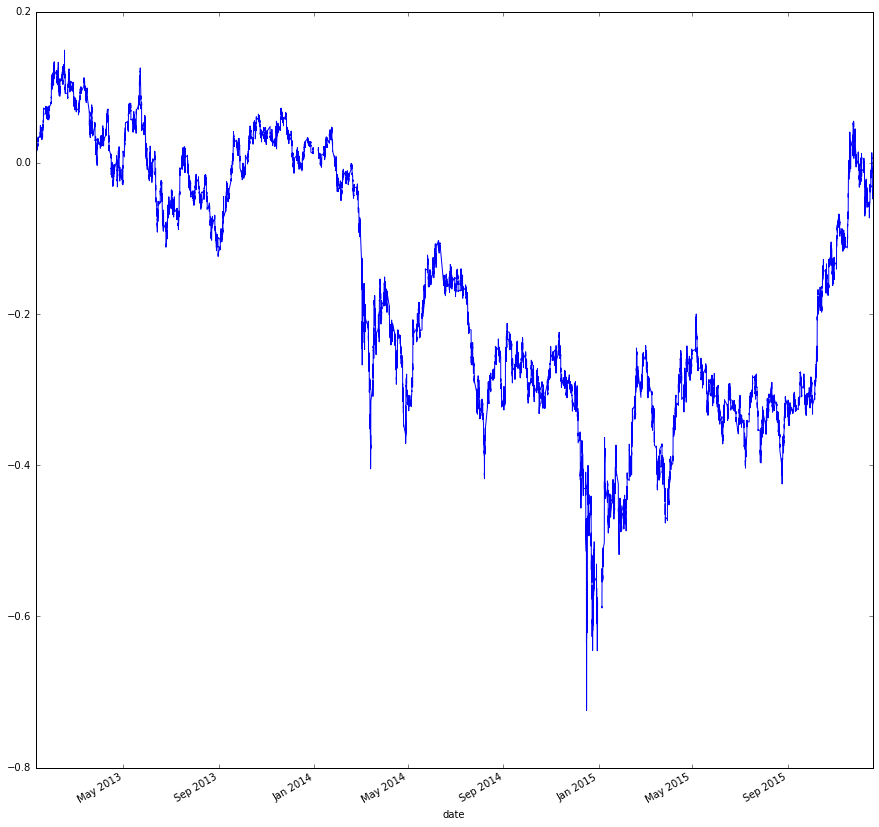

In [82]:
#%%cython
#%%snakeviz
asset = stocks.Asset()

print('reading data...')
#%prun -l 10 -s cumulative asset.load(path='data\\sber.txt')

asset.load(path='data\\sber13.txt')
asset.load(path='data\\sber14.txt', append = True)
asset.load(path='data\\sber15.txt', append = True)

#asset.load(path='data\\micex14.txt')
#asset.load(path='data\\micex15.txt', append = True)

#asset.load(path = 'data\\eurusd.txt')
#asset.load(path = 'data\\ice.brn.txt')

#asset.generate()

asset.minutes = asset.minutes.between_time('10:00','18:40') # дата начала и дата конца не включаются

#display(asset.minutes.head())
#display(asset.minutes.tail())

asset.minutes.d.cumsum().plot()

In [83]:
a = asset.resample('D')
#asset.report()

AR(1) var divider 1


In [17]:
asset.candles.ix[0];

2014-01-13 00:00:00


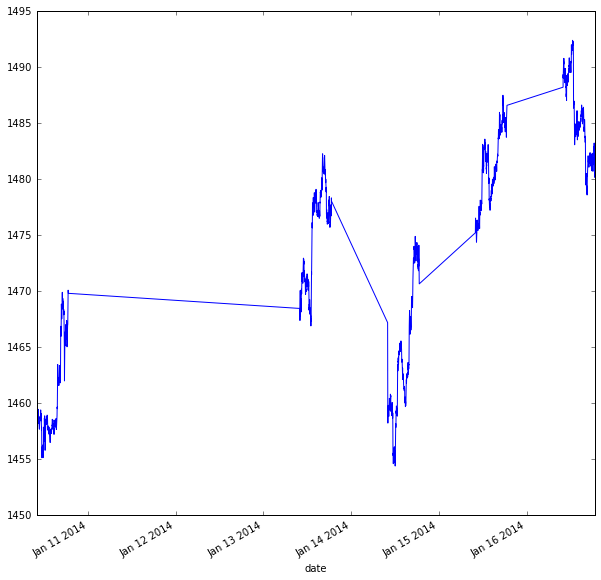

In [19]:
%matplotlib qt
start = 4
print(asset.candles.ix[start].name)
asset.minutes.hl[asset.candles.ix[start-1].beginTime:asset.candles.ix[start + 3].nextTime].plot() #row.beginTime:row.nextTime

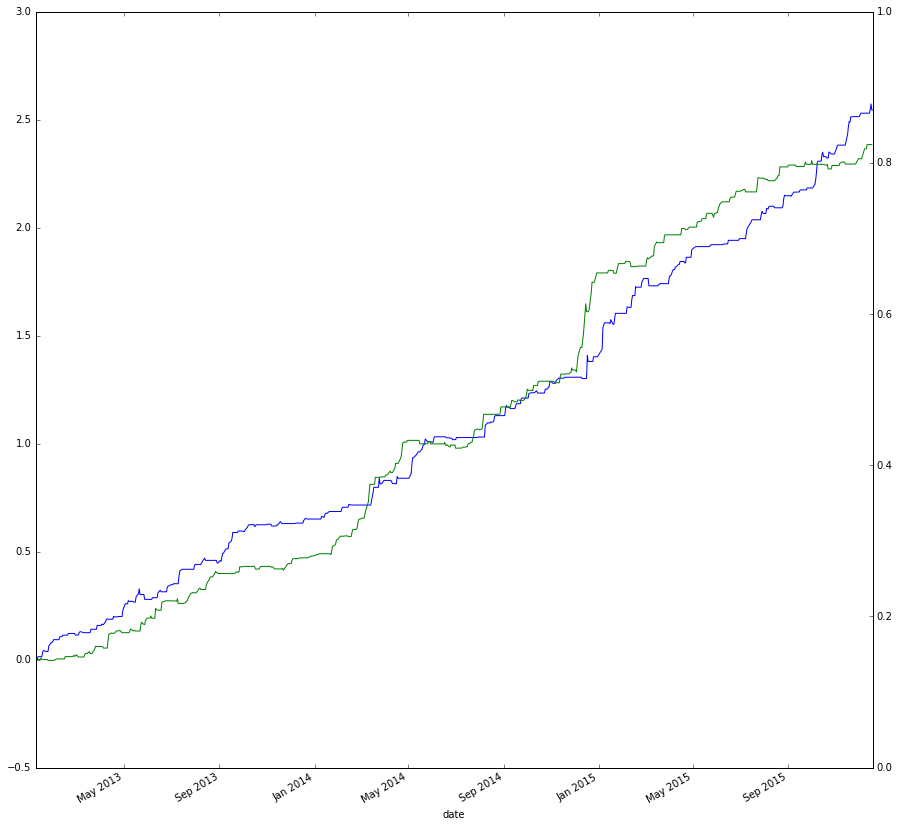

In [84]:
%matplotlib inline 
plt.rc('figure', figsize=(15, 15))
asset.ideal()

0.7
0.725
0.75
0.775
0.8
0.825
0.85
0.875
0.9
('calc time', datetime.timedelta(0, 13, 46000))


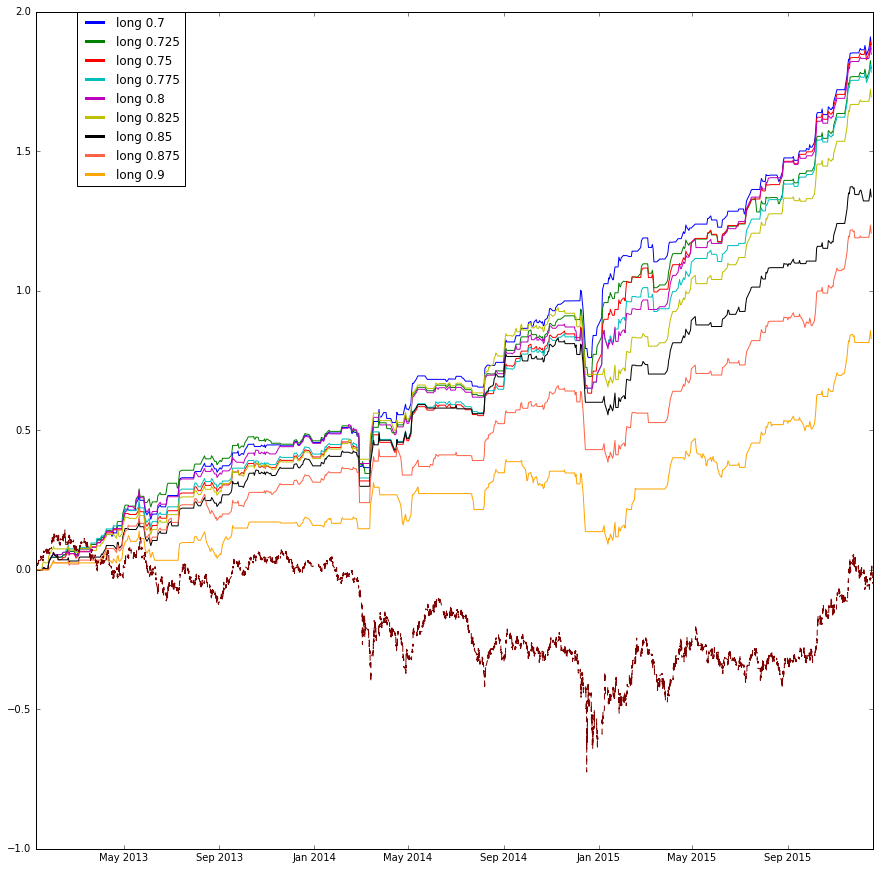

In [85]:
%matplotlib inline
#%matplotlib qt
import optimizer
plt.rc('figure', figsize=(15, 15))
#%matplotlib qt
o = optimizer.Optimizer(asset)
o.use_forecast = True 
o.do()
#plt.show()
#opti()

0.75 0.9


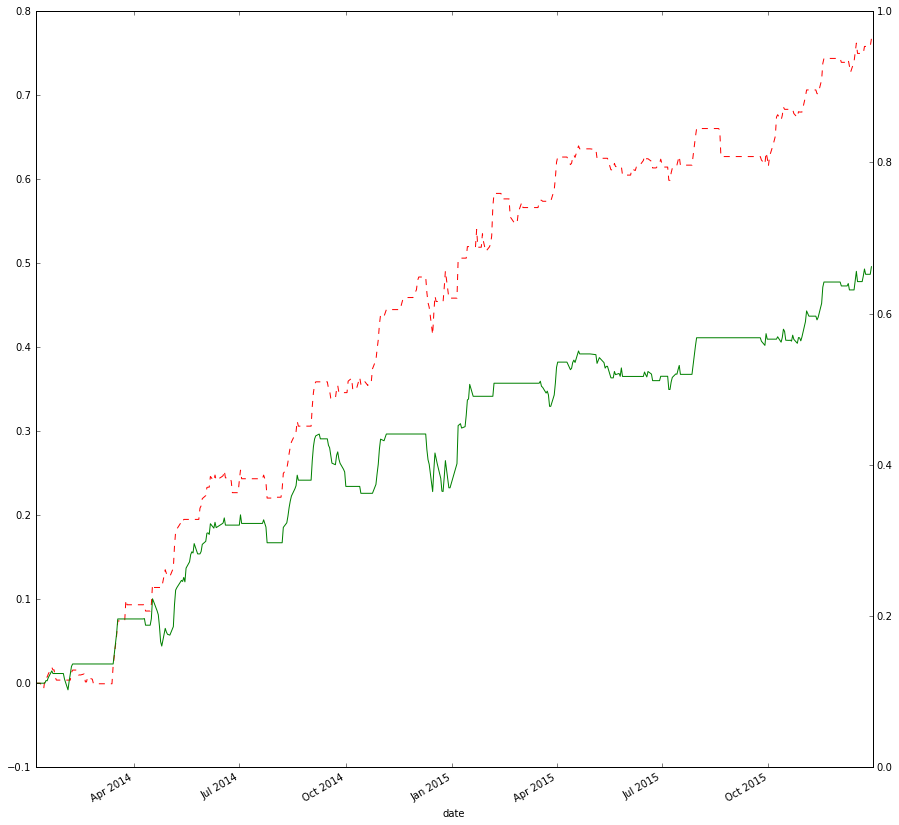

In [73]:
#print o.parameters
i1 = 2
i2 = 8
print(o.parameters[i1], o.parameters[i2])
plt.plot(o.equity_long[i1].cumsum(), '--')
#display(o.equity_long[i1])
o.equity_long[i2].cumsum().plot()
ax = plt.gca()
ax2 = plt.twinx(ax)
#ax2.plot(asset.candles.hl,'o--')
#plt.legend()

In [43]:
g = gorchakov.Statistics()
g.t_levels_range[-2]

stat::need estimation of min dispersion! now min_d = 0.01


0.875

0.7
last position is not closed! -1 1
closing on last candle
0.725
last position is not closed! -1 1
closing on last candle
0.75
last position is not closed! -1 1
closing on last candle
0.775
last position is not closed! -1 1
closing on last candle
0.8
last position is not closed! -1 1
closing on last candle
0.825
last position is not closed! -1 1
closing on last candle
0.85
last position is not closed! -1 1
closing on last candle
error in test!
0.875
last position is not closed! -1 1
closing on last candle
error in test!
0.9
error in test!
('calc time', datetime.timedelta(0, 86, 109000))


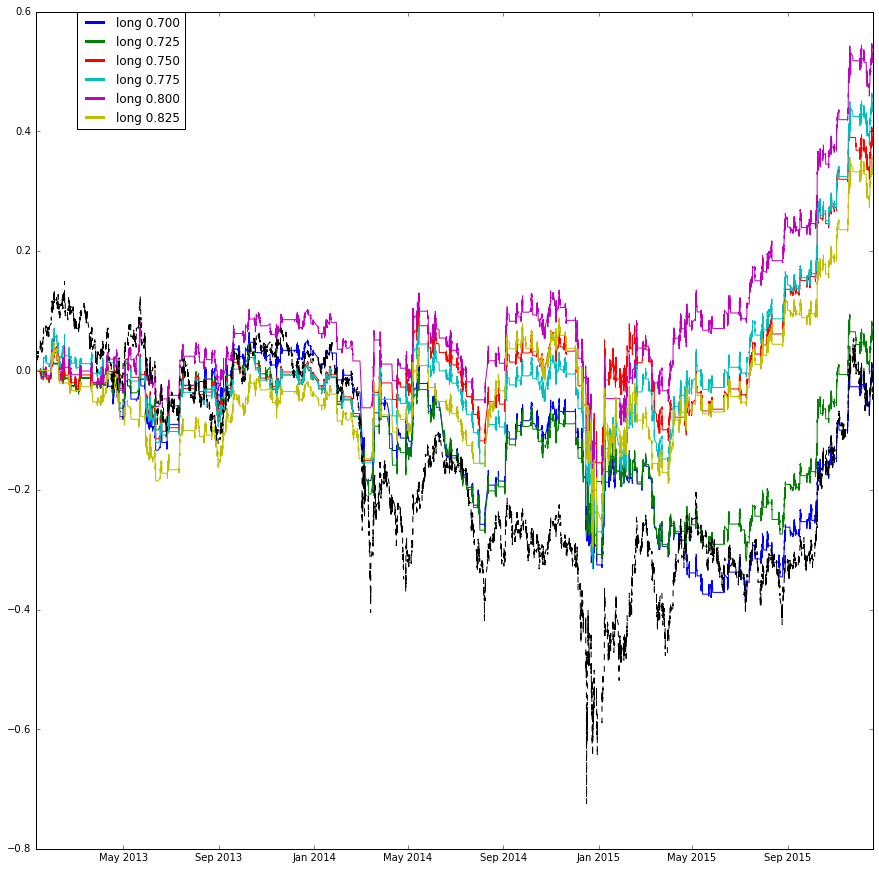

In [86]:
#%%snakeviz
#%matplotlib qt
%matplotlib inline
plt.rc('figure', figsize=(15, 15))
iOpt = optimizer.OptimizerIntraday(asset)
iOpt.do()
#!gprof2dot -f pstats tmpn642xh | dot -Tpng -o profile_results.png

In [ ]:
#iOpt.equity_long[i1][iOpt.equity_long[i1] > 0]
a = iOpt.equity_long[i1].cumsum()
b = iOpt.equity_long[i2].cumsum()
#plt.plot(a)
#plt.plot(b)

In [87]:
#print iOpt.intraday.trader.candles.columns
print iOpt.parameters
i1 = 2
i2 = 3
print iOpt.parameters[i1], iOpt.parameters[i2]
plt.plot(iOpt.equity_long[i1].cumsum(), label = '{}'.format(iOpt.parameters[i1]))
plt.plot(iOpt.equity_long[i2].cumsum(), label = '{}'.format(iOpt.parameters[i2]))
iOpt.equity_short[i1].cumsum().plot()
iOpt.equity_short[i2].cumsum().plot()
#plt.legend()
ax = plt.gca()
#ax2 = plt.twinx(ax)
plt.plot(asset.candles.d.cumsum(),'--', label = 'd')
plt.legend()

SyntaxError: invalid syntax (<ipython-input-87-2be01eae96ea>, line 2)

In [ ]:
#calc time 0:00:56.865000
#calc time 0:26:46.502000
(26 * 60 + 46) / 57

In [ ]:
import intraday as Intraday
def intra():
    #intraday trading
    #что требуется
    #прогноз на сегодняшнюю разладку, прогноз цвета свечи, прогноз на завтрашнюю разладку
    #optimization system
    candles = asset.candles
    t_level = .75
    intraday = Intraday.Intraday(t_level, asset)
    #disorder.t_level1 = 0.75; disorder.t_level2 = .8;
    i = 0
    print 'start', t_level
    for index, row in candles.iterrows():
        if i < 4:#пропускаем первые значения для которых приращения и средние неопределены
            i += 1
            prev_row = row
            continue
        intra_minutes = asset.minutes[row.beginTime:row.nextTime]
        intraday.log.info(index)
        intraday.init(row, intra_minutes)
        for intra_index, intra_row in intra_minutes.iterrows():            
            intraday.check_candle(intra_row)  
        prev_row = row
        #break
        #windowSize += 1
        #i += 1
    intraday.trader.calc()
    intraday.trader.equity_plot(log = True)
    intraday.log.close()
    Beep()
%prun -l 10 -s cumulative intra()

In [ ]:
np.array([1.])

In [ ]:
oc = df.l_open + df.l_close
plt.plot(oc[oc>0],'o')
df[df.l_hold > 0].l_hold.plot()

In [ ]:
#%matplotlib qt
#intraday.trader.calc()
df = intraday.trader.candles.ix['20151101':'20151130']
#print df[df.l_open > 0].l_open.tail()
#df[df.l_hold > 0].l_hold.plot()
df.hl.plot()
plt.plot(df[df.l_open > 0].l_open,'o')
plt.plot(df[df.l_close > 0].l_close,'o')
plt.show()
df.hl.plot()
plt.plot(df[df.sh_open > 0].sh_open,'o')
plt.plot(df[df.sh_close > 0].sh_close,'o')
plt.show()

#df[df.sh_hold > 0].sh_hold.plot()
#df.l_log_equity.plot()
#plt.show()
#df.l_equity.plot()
#tr.candles.loc[tr.index:tr.index,'l_hold'] = 

In [ ]:
asset.candles.head()
df = asset.minutes.ix[0:10]
tr = Trader2(df)
i = 0
for index, row in df.iterrows():
    tr.start(row)
    if i == 0:
        tr.open_at_market(-1)
    if i == 2:
        tr.close_at_market()
    if i == 3:
        tr.open_at_price(1, row.o)
    if i == 5:
        tr.close_at_price(row.c)
    if i == 6:
        tr.open_at_market(-1)
    i += 1
tr.calc()
r = tr.candles 
#r.l_equity.ix[0] = 0
r.l_equity.plot()
r.sh_equity.plot()
plt.show()
r.l_log_equity.plot()
r.sh_log_equity.plot()
r.l_equity.head(10)
r[['l_open','l_hold','l_close', 'l_d', 'l_log_d', 'sh_open','sh_hold','sh_close', 'sh_d', 'sh_log_d',]].head(10)

In [ ]:
display(asset.candles.head(6)[['mean2','mean3', 'd', 'd_sq', 'sum_sq3', 'sum_sq2', 'stat1_up4', 'stat1_down4', 'fmean3']])
row = asset.candles.ix[4]
#print row[['mean2','mean3', 'd', 'd_sq', 'sum_sq3', 'sum_sq2', 'stat1_up3', 'stat1_down3']]
asset.statCalculator.calc_stat1(asset.candles.ix[4], 4, asset.candles.d.ix[4]) 

In [ ]:
candles = asset.candles
#индексы считаем от нуля
ws = 4 #ширина окна включая текущую точку
wsm1 = ws - 1 #без текущей точки, по сути количество приращений которые учитываем или окно по приращениям, не может быть меньше двух
s = 4 # точка где мы считаем статистику, индекс свечи от нуля
mean = candles.d.ix[s-wsm1:s].mean() # среднее по 3-м точкам
sum_sq = candles.d_sq.ix[s-wsm1:s].sum()
d = candles.d.ix[s]
print mean, sum_sq, d
print float(wsm1), float(ws)
a = np.sqrt(float(ws) - 2.) * np.sqrt(float(wsm1) / float(ws))
down = 0. + np.sqrt(sum_sq - float(wsm1) * mean * mean)
up = 0. + a * (d - mean)
r  = up / down
up1 = a * (d - candles.mean3.ix[s])
print up1,candles.stat1_up3.ix[s]
print a, up, down, r
#candles.d_sq.ix[s-ws-1:s-1].mean()
candles.d.ix[s-wsm1:s]
candles.d.ix[s]

In [ ]:
st = gorchakov.Statistics()
res = st.calc_stat1_direct(asset.candles, 7, 6, 0.05)
print res
#display(asset.candles.head(6)[['mean2','mean3', 'd', 'd_sq', 'sum_sq3', 'sum_sq2', 'stat1_up4', 'stat1_down4', 'stat1_4', 'fmean3']])


In [ ]:
display(asset.candles.head(6)[['dcr2_plus4_0.75', 'dcr2_minus4_0.75']])
#display(asset.candles.head(6)[['stat2-1_4']])

In [ ]:
int(np.round(np.random.rand() * 5))

In [ ]:
#графическое и численное решение уравнения на разладку
#Функция статистики несимметрична относительно нуля, поэтому для положительных и для отрицательных значений приращения \
#получаем разные решения. Возможна ситуация когда для разладки вниз приращение может быть положительным.
ds = gorchakov.DisorderSeacher(asset.statCalculator)
data = asset.candles.iloc[3]
root1, root2 = ds.find_disorder_d(data, 3, 0.75)
print root1, root2
#точное решение
print data['dcr1_plus3_0.75'], data['dcr1_minus3_0.75'], data.d
x = np.arange(-.1,.1,0.01)
plt.plot(x, ds.stat_value(x))
y = np.zeros(np.size(x))
y = y + ds.t_value
plt.plot(x, y)
y = y - 2 * ds.t_value
plt.plot(x, y)
plt.plot(root1, ds.t_value, 'o')
plt.plot(root2, -ds.t_value, 'o')

In [ ]:
to_graph = asset.candles['2015-02-01':'2015-06-01']
#to_graph['stat1_3'].plot()
#to_graph['t_3_0.75'].plot()
#to_graph['stat1_4'].plot()
#to_graph['stat1_5'].plot()
#o_graph['stat1_6'].plot()
#to_graph['stat1_7'].plot()
#to_graph['stat1_8'].plot()
#to_graph['stat1_9'].plot()
#to_graph['t_9_0.95'].plot()
to_graph['dcr1_plus3_0.75'].plot()
to_graph['dcr1_minus3_0.75'].plot()
to_graph['dcr1_plus5_0.75'].plot()
to_graph['dcr1_minus5_0.75'].plot()
to_graph['dcr1_plus7_0.75'].plot()
to_graph['dcr1_minus7_0.75'].plot()
to_graph['d'].plot()
plt.show()
to_graph.hl.plot()

In [ ]:
#ideal system
#@numba.jit
def ideal():
    candles = asset.candles
    candles['long_position'] = 0.
    candles['short_position'] = 0.
    tradePosition = 0
    for index, row in candles.iterrows():
        #long   
        if row.d > 0 and row.color > 0:
            tradePosition = 1

        if row.color < 0:
            tradePosition = 0 

        if tradePosition > 0:
            candles.set_value(index,'long_position',row.dp1)

    for index, row in candles.iterrows():
        #short
        if row.d < 0 and row.color < 0:
            tradePosition = -1

        if row.color > 0:
            tradePosition = 0 

        if tradePosition < 0:
            candles.set_value(index,'short_position',row.dp1)            

    candles.long_position.cumsum().plot()
    (-candles.short_position).cumsum().plot() 
    
%timeit ideal()

In [ ]:
data1 = '2015-01-01'
data2 = '2015-03-01'
plt.plot(candles[data1:data2].hl,'.-')
plt.plot(candles[data1:data2].disorders2,'.--')
plt.plot(candles[data1:data2].disorders1)

In [ ]:
# Оценка дисперсии эс-эн
m = pd.ols(y=asset.candles.d, x=asset.candles.d.shift(1), intercept=False)
s = m.resid.std()
ro = asset.candles.d.corr(asset.candles.d.shift(1))
var = (1 - ro * ro) * s * s
np.sqrt(var)

In [ ]:
#автокорреляции
corr_sq = asset.candles.d_sq.corr(asset.candles.d_sq.shift(1))
corr_d = asset.candles.d.corr(asset.candles.d.shift(1))
abs_d = np.abs(asset.candles.d)
#abs_d = abs_d[abs_d<0.003][abs_d>0.001]
corr_abs = abs_d.corr(abs_d.shift(1))
print corr_sq, corr_abs, corr_d
#abs_d.hist()
#abs_d.describe()

In [ ]:
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
candles.long_position.cumsum().tail()
np.exp(1.)
last = candles.tail(1).index[0]
last_row = candles.tail(1)
print last
#last + pd.datetools.BusinessHour(1)
newdate = last + 1 * pd.datetools.BusinessHour(1)
#candles.short_position.cumsum().plot()
print newdate
new_row = last_row.reindex([newdate])
candles = candles.append(new_row)
candles.tail(10)
#last_row
#candles[newdate].d = 0

In [ ]:
tl = 0.9
dcr_plus_col_name = 'dcr1_plus{}_{}'.format(3, tl)
dcr_minus_col_name = 'dcr1_minus{}_{}'.format(3, tl)
#asset.candles[dcr_minus_col_name].plot()
#asset.candles[dcr_plus_col_name].plot()
asset.candles[dcr_minus_col_name]
asset.candles['stat1_down{}'.format(3)]#.plot()
#asset.candles['stat1_{}'.format(3)]

In [ ]:
plt.rc('figure', figsize=(15, 8))
x = np.arange(0, 1 * np.pi,0.01)
y = np.cos(x - np.pi / 2)
plt.plot(x,y)

In [ ]:
#находим максимумы минимумы дня
def next_extremum(a, curent_extremum, ext_index, find_max):
    size = np.size(a)
    if ext_index == size:
        return ext_index, curent_extremum
    if find_max:
        ext_list = np.argwhere(a > curent_extremum)
    else:
        ext_list = np.argwhere(a < curent_extremum)
    if np.size(ext_list) == 0:
        return size, max
    ext_index = ext_list[0, 0]   
    extremum = a[ext_index]
    return ext_index, extremum

row = asset.candles.iloc[1]
#print row
intra_minutes = asset.minutes[row.beginTime:row.nextTime]
intra_matrix = intra_minutes.as_matrix().T
plt.plot(intra_matrix[3])
print intra_matrix.shape
m = intra_matrix[1]
max = m[0]
index_max = index_min = 0
while 1 == 1:
    index_max, max = next_extremum(m, max, index_max, find_max = True)
    index_min, min = next_extremum(m, min, index_min, find_max = False)
    while index_min < index_max:
        print 'min', index_min
        index_min, min = next_extremum(m, min, index_min, find_max = False)
    while index_max < index_min:
        print 'max', index_max
        index_max, max = next_extremum(m, max, index_max, find_max = True)
    if index_max == index_min:
        break
     
#m1 = intra_matrix[:, l[0,0]:][1]


In [ ]:
#цвета с названиями
import matplotlib.colors as colors
import matplotlib.patches as patches
import math


fig = plt.figure()
ax = fig.add_subplot(111)

ratio = 1.0 / 3.0
count = math.ceil(math.sqrt(len(colors.cnames)))
x_count = count * ratio
y_count = count / ratio
x = 0
y = 0
w = 1 / x_count
h = 1 / y_count

for c in colors.cnames:
    pos = (x / x_count, y / y_count)
    ax.add_patch(patches.Rectangle(pos, w, h, color=c))
    ax.annotate(c, xy=pos)
    if y >= y_count-1:
        x += 1
        y = 0
    else:
        y += 1

plt.show()

In [16]:
from IPython.lib import passwd
passwd()

Enter password: ········
Verify password: ········


'sha1:a48fddb8f6cb:2aa0cb345e4ea28024f7288017c0d3b04b67f957'